In [132]:
# Cemhan Kaan Özaltan
# 21902695

import numpy as np
import pandas as pd
import seaborn as sns

In [133]:
df_t = pd.read_csv('./dataset/bbcsports_train.csv') # change path if needed
df_t.head()

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


Sample counts for classes (training data):
Athletics (0): 77
Cricket (1): 86
Football (2): 198
Rugby (3): 114
Tennis (4): 77


[Text(0.5, 1.0, 'Class Distibutions for Training Data')]

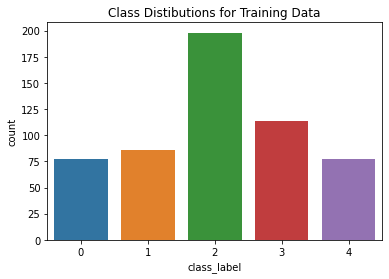

In [134]:
class_count = 5
class_counts = np.array([len(df_t[df_t['class_label'] == i]) for i in range(class_count)], dtype=np.int64)

classes = [
    'Athletics',
    'Cricket',
    'Football',
    'Rugby',
    'Tennis'
]

print('Sample counts for classes (training data):')
for i in range(class_count):
    print(f'{classes[i]} ({i}): {class_counts[i]}')
    
sns.countplot(x=df_t['class_label']).set(title='Class Distibutions for Training Data')

In [135]:
df_v = pd.read_csv('./dataset/bbcsports_val.csv') # change path if needed
df_v.head()

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


Sample counts for classes (validation data):
Athletics (0): 24
Cricket (1): 38
Football (2): 67
Rugby (3): 33
Tennis (4): 23


[Text(0.5, 1.0, 'Class Distibutions for Validation Data')]

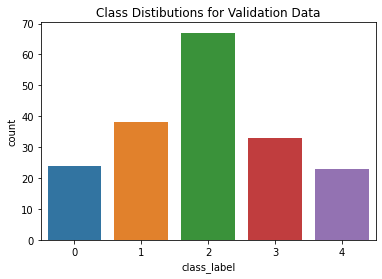

In [136]:
class_counts_val = np.array([len(df_v[df_v['class_label'] == i]) for i in range(class_count)], dtype=np.int64)

print('Sample counts for classes (validation data):')
for i in range(class_count):
    print(f'{classes[i]} ({i}): {class_counts_val[i]}')
    
sns.countplot(x=df_v['class_label']).set(title='Class Distibutions for Validation Data')

In [137]:
train = df_t.to_numpy(dtype=np.int64)
vocab_size = train.shape[1] - 1

t = np.zeros((class_count, vocab_size), dtype=np.int64)
t_sum = np.zeros((class_count, 1), dtype=np.int64) # column vector (to allow operations)

# fit stage
for i in train:
    for j in range(vocab_size):
        t_sum[i[vocab_size]] += i[j]
        t[i[vocab_size], j] += i[j]

theta = t / t_sum # row-wise operation
log_theta = np.log(theta)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


In [138]:
N = np.sum(class_counts)
pi = class_counts / N
log_pi = np.log(pi)

In [139]:
val = df_v.to_numpy(dtype=np.int64)
val_size = val.shape[0]
labels = np.zeros(val_size, dtype=np.int64)
predictions = np.zeros(val_size, dtype=np.int64)
cnt = 0
NINF = -10 ** 15 # imitate -inf

# predict stage
for i in val:
    y_hats = np.copy(log_pi)
    for j in range(vocab_size):
        for k in range(class_count):
            if i[j] != 0 and t[k, j] != 0: # log result must not be -inf (log0 = -inf)
                y_hats[k] += i[j] * log_theta[k, j]
            elif i[j] != 0:
                y_hats[k] += i[j] * NINF
    predictions[cnt] = y_hats.argmax()
    labels[cnt] = i[vocab_size]
    cnt += 1

In [140]:
def confusion_matrix(y_true, y_pred):
    cm = np.zeros((class_count, class_count), dtype=np.int64)
    correct_count, wrong_count = 0, 0
    
    for i in range(val_size):
        cm[y_true[i], y_pred[i]] += 1
        
        if y_true[i] == y_pred[i]:
            correct_count += 1
        else:
            wrong_count += 1
        
    return cm, correct_count, wrong_count

cm, correct_count, wrong_count = confusion_matrix(labels, predictions)    
accuracy = correct_count / cnt
print(f'Accuracy: {accuracy * 100}%')
print('Wrong prediction count:', wrong_count)

Accuracy: 96.75675675675676%
Wrong prediction count: 6


[Text(0.5, 15.0, 'Predicted label'),
 Text(33.0, 0.5, 'True label'),
 Text(0.5, 1.0, 'Confusion Matrix')]

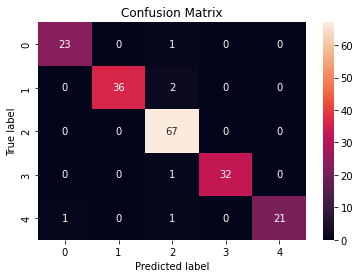

In [141]:
sns.heatmap(cm, annot=True).set(xlabel='Predicted label', ylabel='True label', title='Confusion Matrix')

In [142]:
cnt = 0
labels = np.zeros(val_size, dtype=np.int64)
predictions = np.zeros(val_size, dtype=np.int64)
alpha = 1
t += alpha
t_sum += alpha * vocab_size
theta = t / t_sum
log_theta = np.log(theta)

# predict stage with a Dirichlet prior
for i in val:
    y_hats = np.copy(log_pi)
    for j in range(vocab_size):
        for k in range(class_count):
            y_hats[k] += i[j] * log_theta[k, j]
    predictions[cnt] = y_hats.argmax()
    labels[cnt] = i[vocab_size]
    cnt += 1

In [143]:
cm, correct_count, wrong_count = confusion_matrix(labels, predictions)    
accuracy = correct_count / cnt
print(f'Accuracy (with Dirichlet prior): {accuracy * 100}%')
print('Wrong prediction count (with Dirichlet prior):', wrong_count)

Accuracy (with Dirichlet prior): 97.2972972972973%
Wrong prediction count (with Dirichlet prior): 5


[Text(0.5, 15.0, 'Predicted label'),
 Text(33.0, 0.5, 'True label'),
 Text(0.5, 1.0, 'Confusion Matrix (with Dirichlet prior)')]

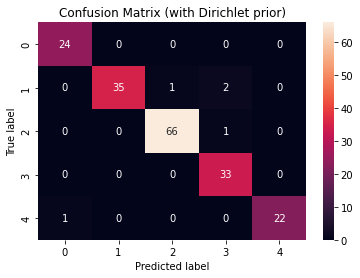

In [144]:
sns.heatmap(cm, annot=True).set(xlabel='Predicted label', ylabel='True label', title='Confusion Matrix (with Dirichlet prior)')